In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fruit-recognition/sampleSubmission.csv
/kaggle/input/fruit-recognition/test/test/0664.jpg
/kaggle/input/fruit-recognition/test/test/1269.jpg
/kaggle/input/fruit-recognition/test/test/3863.jpg
/kaggle/input/fruit-recognition/test/test/2193.jpg
/kaggle/input/fruit-recognition/test/test/0733.jpg
/kaggle/input/fruit-recognition/test/test/3750.jpg
/kaggle/input/fruit-recognition/test/test/2008.jpg
/kaggle/input/fruit-recognition/test/test/2081.jpg
/kaggle/input/fruit-recognition/test/test/0106.jpg
/kaggle/input/fruit-recognition/test/test/0375.jpg
/kaggle/input/fruit-recognition/test/test/3919.jpg
/kaggle/input/fruit-recognition/test/test/3757.jpg
/kaggle/input/fruit-recognition/test/test/4489.jpg
/kaggle/input/fruit-recognition/test/test/3138.jpg
/kaggle/input/fruit-recognition/test/test/3417.jpg
/kaggle/input/fruit-recognition/test/test/5307.jpg
/kaggle/input/fruit-recognition/test/test/5039.jpg
/kaggle/input/fruit-recognition/test/test/4407.jpg
/kaggle/input/fruit-recogniti

In [2]:
import numpy as np
import pandas as pd

In [3]:
import torch
from torchvision import datasets, transforms
device = "cuda" if torch.cuda.is_available() else "cpu"

In [4]:
data_dir = '/kaggle/input/fruit-recognition/train/train'

dataset = datasets.ImageFolder(root=data_dir)
len(dataset)

16854

In [5]:
dataset[0]

(<PIL.Image.Image image mode=RGB size=100x100>, 0)

In [6]:
transform = transforms.Compose([
    transforms.Resize((100, 100)),
    transforms.ToTensor(),
])

dataset = datasets.ImageFolder(root=data_dir, transform=transform)

In [7]:
image_tensor, label = dataset[0]
image_tensor.size()

torch.Size([3, 100, 100])

In [8]:
from torch.utils.data import random_split

train_ratio = 0.8

train_data, val_data = random_split(dataset, [train_ratio, 1-train_ratio])

In [9]:
train_transform = transforms.Compose([
    transforms.Resize((100, 100)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomVerticalFlip(p=0.5),
    transforms.RandomRotation(degrees=(15)),
    transforms.ToTensor()
])

test_transform = transforms.Compose([
    transforms.Resize((100, 100)),
    transforms.ToTensor(),
])


class TransformDataset(torch.utils.data.Dataset):
    def __init__(self, subset, transform=None):
        self.subset = subset
        self.transform = transform
        
    def __getitem__(self, index):
        x, y = self.subset[index]
        if self.transform:
            x = self.transform(x)
        return x, y
        
    def __len__(self):
        return len(self.subset)

    
train_data = TransformDataset(train_data, transform = train_transform)
val_data = TransformDataset(val_data, transform = test_transform)

In [10]:
len(train_data), len(val_data)

(13484, 3370)

In [11]:
batch_size = 32

train_loader = torch.utils.data.DataLoader(train_data, shuffle=True, batch_size=batch_size)
val_loader = torch.utils.data.DataLoader(val_data, shuffle=True, batch_size=batch_size)

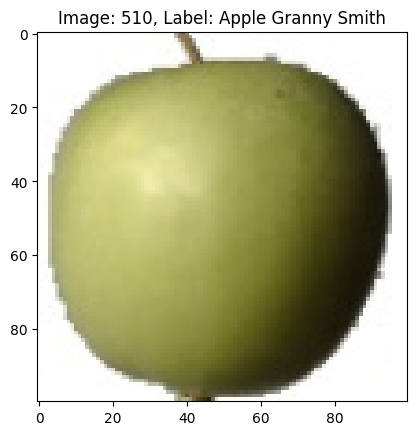

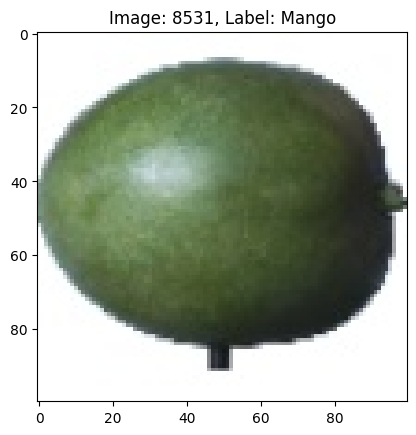

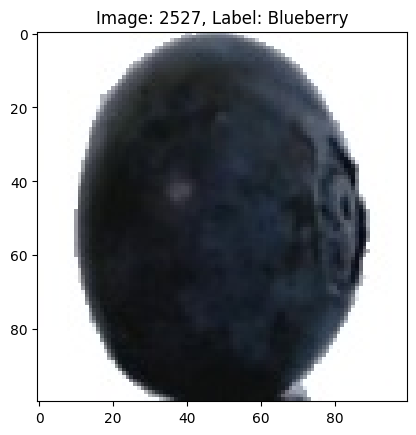

In [12]:
import matplotlib.pyplot as plt
import random

for _ in range(3):
    random_fruit = random.randint(0, 16854) 
    img, label = dataset[random_fruit]

    img = img.numpy()

    img = img.transpose((1, 2, 0))

    label_name = dataset.classes[label]

    plt.imshow(img)
    plt.title(f"Image: {random_fruit+1}, Label: {label_name}")
    plt.show()

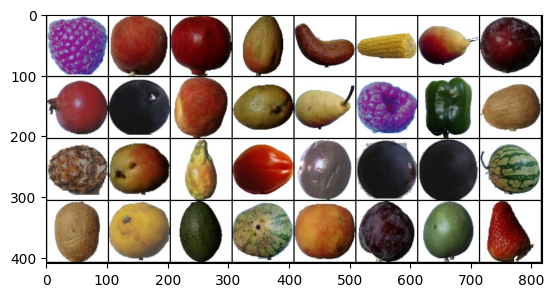

In [13]:
from torchvision.utils import make_grid

loader = torch.utils.data.DataLoader(dataset, shuffle=True, batch_size=32)
  
batch, labels = next(iter(loader))

grid = make_grid(batch).permute(1, 2, 0)

plt.imshow(grid)